<a href="https://colab.research.google.com/github/RebeccaKessler/Otter_Group_Project/blob/main/Copy_of_AnalysisPotatoes_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import plotly.express as px
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
!pip install stargazer
from stargazer.stargazer import Stargazer

In [ ]:
df = pd.read_csv("Potatoes.csv")

In [ ]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1510,Potatoes,1961,1961,ha,15000.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,1510,Potatoes,1961,1961,100 g/ha,86667.0,I,Imputed value,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1510,Potatoes,1961,1961,t,130000.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1510,Potatoes,1962,1962,ha,15000.0,X,Figure from international organizations,Unofficial figure
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,1510,Potatoes,1962,1962,100 g/ha,76667.0,X,Figure from international organizations,Unofficial figure


In [ ]:
df_t = df.loc[df.Unit == 't',['Area','Value','Year']]
df_ha = df.loc[df.Unit == 'ha',['Area','Value','Year']]
df_gha = df.loc[df.Unit == '100 g/ha',['Area','Value','Year']]

In [ ]:
df_t['Area'] = df_t['Area'].str.replace('Türkiye', 'Turkey')
df_ha['Area'] = df_ha['Area'].str.replace('Türkiye', 'Turkey')
df_gha['Area'] = df_gha['Area'].str.replace('Türkiye', 'Turkey')

In [ ]:
df_t_2021 = df_t.loc[df_t.Year == 2021,:]
df_t_1961 = df_t.loc[df_t.Year == 1961,:]

In [ ]:
China = ["China, Taiwan Province of","China, mainland"]
df_t = df_t.loc[~(df_t.Area.isin(China))]
df_ha = df_ha.loc[~(df_ha.Area.isin(China))]
#remove Fiji since it stopped its potato production in recent years
df_t = df_t.loc[~(df_t.Area == "Fiji")]
df_ha = df_ha.loc[~(df_ha.Area == "Fiji")]
df_t_2021 = df_t_2021.loc[~(df_t_2021.Area.isin(China))]

In [ ]:
def regroup (c_list,y_list,df_,name_of_region):
  value = 0
  for y in y_list:
    value = df_.loc[(df_.Area.isin(c_list)) & (df_.Year == y),"Value"].sum()
    new_row = {"Area": name_of_region, "Value": value, "Year": y}
    df_ = df_.append(new_row,ignore_index=True)
  df_ = df_.loc[~(df_.Area.isin(c_list))]
  df_ = df_.sort_values(by = ["Area","Year"])
  return df_

In [ ]:
SM = ["Serbia","Montenegro"]
df_t = regroup(SM,list(range(2006,2022,1)),df_t.copy(),"Serbia and Montenegro")
df_ha = regroup(SM,list(range(2006,2022,1)),df_ha.copy(),"Serbia and Montenegro")
USSR_region = ['Armenia','Azerbaijan','Belarus','Estonia','Georgia','Kazakhstan','Kyrgyzstan'
,'Latvia','Lithuania','Republic of Moldova','Russian Federation','Tajikistan','Turkmenistan',
'Ukraine','Uzbekistan']
df_t = regroup(USSR_region,list(range(1992,2022,1)),df_t.copy(),"USSR")
df_ha = regroup(USSR_region,list(range(1992,2022,1)),df_ha.copy(),"USSR")
Yugo = ['Bosnia and Herzegovina','Croatia','North Macedonia','Serbia and Montenegro','Slovenia']
df_t = regroup(Yugo,list(range(1992,2022,1)),df_t.copy(),"Yugoslav SFR")
df_ha = regroup(Yugo,list(range(1992,2022,1)),df_ha.copy(),"Yugoslav SFR")
Czechoslovakia = ['Czechia','Slovakia']
df_t = regroup(Czechoslovakia,list(range(1993,2022,1)),df_t.copy(),"Czechoslovakia")
df_ha = regroup(Czechoslovakia,list(range(1993,2022,1)),df_ha.copy(),"Czechoslovakia")
BL = ["Belgium","Luxembourg"]
df_t = regroup(BL,list(range(2000,2022,1)),df_t.copy(),"Belgium-Luxembourg")
df_ha = regroup(BL,list(range(2000,2022,1)),df_ha.copy(),"Belgium-Luxembourg")
Ethiopia = ["Ethiopia","Eritrea"]
df_t = regroup(Ethiopia,list(range(1993,2022,1)),df_t.copy(),"Ethiopia PDR")
df_ha = regroup(Ethiopia,list(range(1993,2022,1)),df_ha.copy(),"Ethiopia PDR")

In [ ]:
Missing_value = ['American Samoa', 'Antigua and Barbuda', 'Aruba', 'Barbados', 'Burundi',
 'Cabo Verde', 'Cayman Islands', 'Christmas Island', 'Comoros', 'Congo',
 'Costa Rica', 'Djibouti', 'Equatorial Guinea', 'Eritrea',
 'Falkland Islands (Malvinas)', 'French Southern Territories', 'Jamaica',
 'Kiribati', 'Maldives', 'Mayotte', 'Midway Island', 'Montserrat', 'Nauru',
 'Niue', 'Norfolk Island', 'Palau', 'Panama', 'Pitcairn', 'Rwanda', 'Réunion',
 'Saint Kitts and Nevis', 'Samoa', 'Sao Tome and Principe', 'Sierra Leone',
 'Singapore', 'Solomon Islands',
 'South Georgia and the South Sandwich Islands', 'Sudan (former)',
 'Timor-Leste', 'Tokelau', 'Turks and Caicos Islands', 'Tuvalu' ,'Wake Island',
 'Yemen']
df_missing_value = df_t.loc[df_t.Area.isin(Missing_value),:]
print((df_missing_value.Value.sum()/df_t.Value.sum())*100)
df_t = df_t.loc[~df_t.Area.isin(Missing_value),:]
df_ha = df_ha.loc[~df_ha.Area.isin(Missing_value),:]

0.31853285701708134


In [ ]:
All_years = []
Not_all_years = []
y_list = list(df_t["Year"].unique())
for c in list(df_t["Area"].unique()):
  df_inter = df_t.loc[df_t.Area == c,"Year"]
  y_list_inter = list(df_inter.unique())
  if y_list == y_list_inter:
    All_years.append(c)
  else:
    Not_all_years.append(c)

df_all_years = df_t.loc[df_t.Area.isin(All_years),:]
df_not_all_years = df_t.loc[df_t.Area.isin(Not_all_years),:]

print(df_t.Value.sum())
print(df_all_years.Value.sum())
stat = df_not_all_years.Value.sum()/df_t.Value.sum()*100
print(f"{round(stat,2)}%")
print(list(df_t["Area"].unique()))

df_t = df_t.loc[df_t.Area.isin(All_years),:]
df_ha = df_ha.loc[df_ha.Area.isin(All_years),:]

18432676269.899998
18416815811.56
0.09%
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Cuba', 'Cyprus', 'Czechoslovakia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia PDR', 'Faroe Islands', 'Finland', 'France', 'French Polynesia', 'Germany', 'Greece', 'Guadeloupe', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kuwait', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi'

In [ ]:
Africa = ["Algeria",'Angola','Cameroon','Central African Republic','Chad','Democratic Republic of the Congo','Egypt','Eswatini','Ethiopia PDR', 'Kenya','Lesotho','Libya','Madagascar',"Malawi","Mauritania",  'Mauritius',  'Morocco',  'Mozambique',  'Nigeria',  'Senegal', 'South Africa',  'Tunisia', 'Uganda',  'United Republic of Tanzania',  'Zambia','Zimbabwe']
NA = ['Canada','Cuba','Dominica','Dominican Republic','El Salvador','Guatemala','Haiti','Honduras', "Mexico",  'Nicaragua',  'United States of America']
SA = ['Argentina','Bolivia (Plurinational State of)','Brazil','Chile','Colombia','Ecuador', "Paraguay",  'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)']
Asia = ["Afghanistan",'Bangladesh','Bhutan','Cyprus',"China","Democratic People's Republic of Korea",'India','Indonesia','Iran (Islamic Republic of)','Iraq','Israel', 'Japan','Jordan',"Lao People's Democratic Republic", 'Lebanon',  'Mongolia',  'Myanmar',  'Nepal',  'Pakistan',  'Philippines',  'Republic of Korea', 'Saudi Arabia',  'Sri Lanka',  'Syrian Arab Republic',  'Thailand',  'Turkey',  'Viet Nam']
Europe = ["USSR",'Albania','Austria','Belgium-Luxembourg','Bulgaria','Czechoslovakia','Denmark','Faroe Islands','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Italy', "Malta",  'Netherlands (Kingdom of the)',  'Norway',  'Poland', 'Portugal',  'Romania',  'Spain', 'Sweden',  'Switzerland',  'United Kingdom of Great Britain and Northern Ireland',  'Yugoslav SFR']
Oceania = ['Australia','Fiji','French Polynesia', "New Caledonia", 'New Zealand', 'Papua New Guinea']

In [ ]:
df_continent_t = df_t.copy()
df_continent_t = regroup(Africa,list(range(1961,2022,1)),df_continent_t.copy(),"Africa")
df_continent_t = regroup(NA,list(range(1961,2022,1)),df_continent_t.copy(),"North America")
df_continent_t = regroup(SA,list(range(1961,2022,1)),df_continent_t.copy(),"South America")
df_continent_t = regroup(Asia,list(range(1961,2022,1)),df_continent_t.copy(),"Asia")
df_continent_t = regroup(Europe,list(range(1961,2022,1)),df_continent_t.copy(),"Europe")
df_continent_t = regroup(Oceania,list(range(1961,2022,1)),df_continent_t.copy(),"Oceania")

df_continent_ha = df_ha.copy()
df_continent_ha = regroup(Africa,list(range(1961,2022,1)),df_continent_ha.copy(),"Africa")
df_continent_ha = regroup(NA,list(range(1961,2022,1)),df_continent_ha.copy(),"North America")
df_continent_ha = regroup(SA,list(range(1961,2022,1)),df_continent_ha.copy(),"South America")
df_continent_ha = regroup(Asia,list(range(1961,2022,1)),df_continent_ha.copy(),"Asia")
df_continent_ha = regroup(Europe,list(range(1961,2022,1)),df_continent_ha.copy(),"Europe")
df_continent_ha = regroup(Oceania,list(range(1961,2022,1)),df_continent_ha.copy(),"Oceania")

In [ ]:
value_t = 0
value_ha = 0
value_tha = 0
df_tha = df_t.loc[df_t.Area == "Nothing"]
for c in list(df_t.Area.unique()):
  for y in list(range(1961,2022,1)):
    value_t = df_t.loc[(df_t.Area == c) & (df_t.Year == y),"Value"].sum()
    value_ha = df_ha.loc[(df_ha.Area == c) & (df_ha.Year == y),"Value"].sum()
    value_tha = value_t/value_ha
    new_row = {"Area": c, "Value": value_tha, "Year": y}
    df_tha = df_tha.append(new_row,ignore_index=True)

value_t = 0
value_ha = 0
value_tha = 0
df_continent_tha = df_continent_t.loc[df_continent_t.Area == "Nothing"]
for c in list(df_continent_t.Area.unique()):
  for y in list(range(1961,2022,1)):
    value_t = df_continent_t.loc[(df_continent_t.Area == c) & (df_continent_t.Year == y),"Value"]
    value_ha = df_continent_ha.loc[(df_continent_ha.Area == c) & (df_continent_ha.Year == y),"Value"]
    value_tha = value_t/value_ha
    new_row = {"Area": c, "Value": value_tha, "Year": y}
    df_continent_tha = df_continent_tha.append(new_row,ignore_index=True)


In [ ]:
value_new = 0
value_old = 0
growth = 0
df_t_evol = df_t.loc[df_t.Area == "Nothing",["Area","Value"]]
for c in list(df_t.Area.unique()):
    value_new = df_t.loc[(df_t.Area == c) & (df_t.Year.isin(list(range(2011,2022)))),"Value"].mean()
    value_old = df_t.loc[(df_t.Area == c) & (df_t.Year.isin(list(range(1961,1972)))),"Value"].mean()
    growth = ((value_new-value_old)/value_old)*100
    new_row = {"Area": c, "Value": growth}
    df_t_evol = df_t_evol.append(new_row,ignore_index=True)





In [ ]:
value_new = 0
value_old = 0
growth = 0
df_tha_evol = df_tha.loc[df_tha.Area == "Nothing",["Area","Value"]]
for c in list(df_tha.Area.unique()):
    value_new = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(2011,2022)))),"Value"].mean()
    value_old = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(1961,1972)))),"Value"].mean()
    growth = ((value_new-value_old)/value_old)*100
    new_row = {"Area": c, "Value": growth}
    df_tha_evol = df_tha_evol.append(new_row,ignore_index=True)

value_new = 0
value_old = 0
growth = 0
df_tha_evol_70 = df_tha.loc[df_tha.Area == "Nothing",["Area","Value"]]
for c in list(df_tha.Area.unique()):
    value_new = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(2020,2022)))),"Value"].mean()
    value_old = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(1970,1972)))),"Value"].mean()
    growth = ((value_new-value_old)/value_old)*100
    new_row = {"Area": c, "Value": growth}
    df_tha_evol_70 = df_tha_evol_70.append(new_row,ignore_index=True)

In [ ]:
value_new = 0
value_old = 0
growth = 0
df_tha_evol = df_tha.loc[df_tha.Area == "Nothing",["Area","Value"]]
for c in list(df_tha.Area.unique()):
    value_new = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(2011,2022)))),"Value"].mean()
    value_old = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(1961,1972)))),"Value"].mean()
    growth = ((value_new-value_old)/value_old)*100
    new_row = {"Area": c, "Value": growth}
    df_tha_evol = df_tha_evol.append(new_row,ignore_index=True)

value_new = 0
value_old = 0
growth = 0
df_tha_evol_70 = df_tha.loc[df_tha.Area == "Nothing",["Area","Value"]]
for c in list(df_tha.Area.unique()):
    value_new = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(2020,2022)))),"Value"].mean()
    value_old = df_tha.loc[(df_tha.Area == c) & (df_tha.Year.isin(list(range(1970,1972)))),"Value"].mean()
    growth = ((value_new-value_old)/value_old)*100
    new_row = {"Area": c, "Value": growth}
    df_tha_evol_70 = df_tha_evol_70.append(new_row,ignore_index=True)

In [ ]:
df_t_2021_log = df_t_2021.copy()
df_t_2021_log.Value = np.log(df_t_2021_log.Value)

df_map = df_t_2021_log.groupby('Area')['Value'].mean().reset_index()
fig = px.choropleth(df_map,
                    locations='Area',
                    locationmode='country names',
                    color='Value',
                    hover_name='Area',
                    color_continuous_scale='viridis')
fig.update_layout(title={'text': 'Potato yields in tonnes per country in 2021',
                                   'y':0.95,
                                   'x':0.5,
                                   'xanchor': 'center',
                                   'yanchor': 'top'})
fig.update_layout(coloraxis_colorbar_x=0.88)
fig.show()

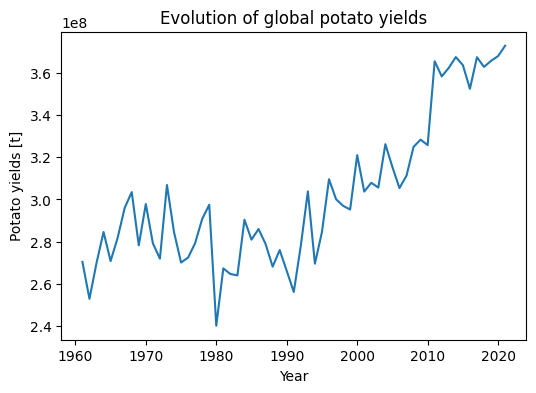

In [ ]:
df_sum = df_t.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(df_sum['Year'], df_sum['Value'], linestyle='-')
plt.title('Evolution of global potato yields')
plt.xlabel('Year')
plt.ylabel('Potato yields [t]')
plt.show()

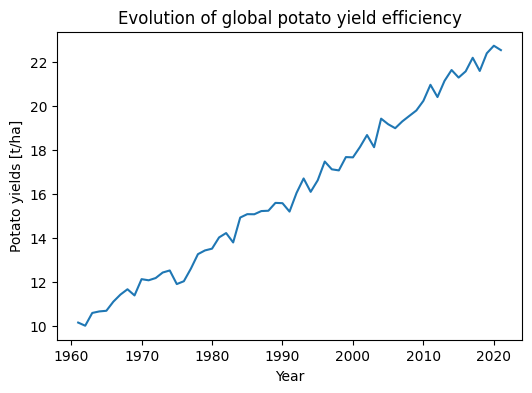

In [ ]:
df_tha_mean = df_tha.groupby('Year')['Value'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(df_tha_mean['Year'], df_tha_mean['Value'], linestyle='-')
plt.title('Evolution of global potato yield efficiency')
plt.xlabel('Year')
plt.ylabel('Potato yields [t/ha]')
plt.show()

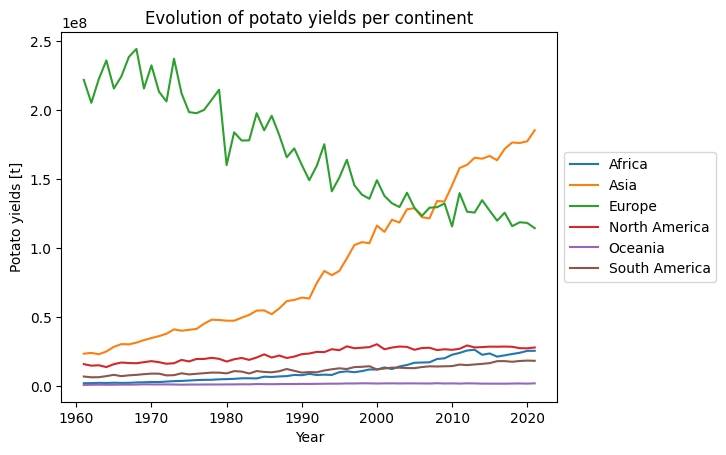

In [ ]:
grouped_data = df_continent_t.groupby('Area')

for country, group in grouped_data:
    plt.plot(group['Year'], group['Value'], label=country)

plt.title('Evolution of potato yields per continent')
plt.xlabel('Year')
plt.ylabel('Potato yields [t]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

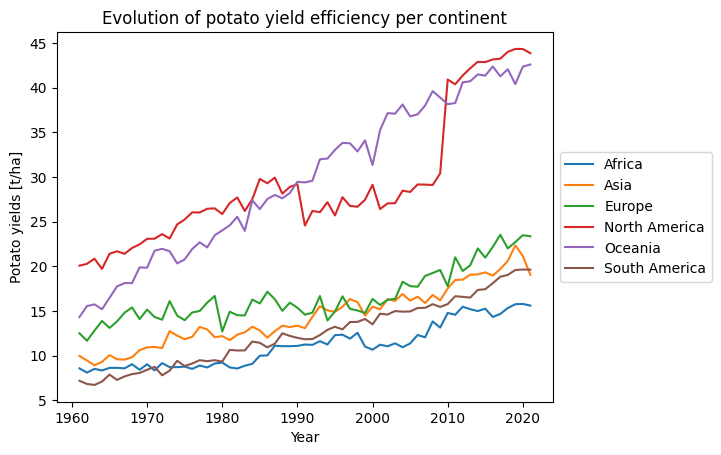

In [ ]:
grouped_data = df_continent_tha.groupby('Area')

for country, group in grouped_data:
    plt.plot(group['Year'], group['Value'], label=country)

plt.title('Evolution of potato yield efficiency per continent')
plt.xlabel('Year')
plt.ylabel('Potato yields [t/ha]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df_tha["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bangladesh', 'Belgium-Luxembourg',
       'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil', 'Bulgaria',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Cuba', 'Cyprus', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eswatini', 'Ethiopia PDR', 'Faroe Islands', 'Finland', 'France',
       'French Polynesia', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', "Lao People's Democratic Republic",
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongoli

In [ ]:
len(list(df_tha["Area"].unique()))

106

In [ ]:
df_tha.to_csv("Potatoes_tha.csv",index=False)
df_t.to_csv("Yield_t.csv",index=False)